In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('data/Titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   Residence  1309 non-null   int64 
 3   name       1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
 14  Gender     1309 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 153.5+ KB


In [3]:
df.head(15)

,pclass,survived,Residence,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Gender
0,3,0,0,"Abbing, Mr. Anthony",42,0,0,C.A. 5547,7.55,,S,,,,0
1,3,0,0,"Abbott, Master. Eugene Joseph",13,0,2,C.A. 2673,20.25,,S,,,"East Providence, RI",0
2,3,0,0,"Abbott, Mr. Rossmore Edward",16,1,1,C.A. 2673,20.25,,S,,190,"East Providence, RI",0
3,3,1,0,"Abbott, Mrs. Stanton (Rosa Hunt)",35,1,1,C.A. 2673,20.25,,S,A,,"East Providence, RI",1
4,3,1,2,"Abelseth, Miss. Karen Marie",16,0,0,348125,7.65,,S,16,,"Norway Los Angeles, CA",1
5,3,1,0,"Abelseth, Mr. Olaus Jorgensen",25,0,0,348122,7.65,F G63,S,A,,"Perkins County, SD",0
6,2,0,2,"Abelson, Mr. Samuel",30,1,0,P/PP 3381,24,,C,,,"Russia New York, NY",0
7,2,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",28,1,0,P/PP 3381,24,,C,10,,"Russia New York, NY",1
8,3,1,2,"Abrahamsson, Mr. Abraham August Johannes",20,0,0,SOTON/O2 3101284,7.925,,S,15,,"Taalintehdas, Finland Hoboken, NJ",0
9,3,1,2,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18,0,0,2657,7.2292,,C,C,,"Greensburg, PA",1


In [4]:
df.describe()

,pclass,survived,Residence,sibsp,parch,Gender
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,1.375095,0.498854,0.385027,0.355997
std,0.837836,0.486055,0.793142,1.041658,0.865560,0.478997
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,2.000000,8.000000,9.000000,1.000000


## Видалення стовпців від яких не залежить виживання пасажирів

In [5]:
# В даному випадку ми вважаємо що виживання пасажирів ніяк не залежить від їх
# імені, номеру квитка, номера каюти, boat (не зрозуміло що мається на увазі в даному контексті),
# body (також не зрозуміло з контексту), місця призначення, тому такі стовпці видаляємо.
df = df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
df.head(10)

,pclass,survived,Residence,age,sibsp,parch,fare,embarked,Gender
0,3,0,0,42,0,0,7.55,S,0
1,3,0,0,13,0,2,20.25,S,0
2,3,0,0,16,1,1,20.25,S,0
3,3,1,0,35,1,1,20.25,S,1
4,3,1,2,16,0,0,7.65,S,1
5,3,1,0,25,0,0,7.65,S,0
6,2,0,2,30,1,0,24,C,0
7,2,1,2,28,1,0,24,C,1
8,3,1,2,20,0,0,7.925,S,0
9,3,1,2,18,0,0,7.2292,C,1


## Зміна назв стовців під єдиний формат

In [6]:
df = df.rename(columns={
    'Residence': 'residence',
    'Gender': 'gender',
})

## Перевірка пропущених значень в рядках

In [7]:
df.isnull().sum()

pclass       0
survived     0
residence    0
age          0
sibsp        0
parch        0
fare         0
embarked     0
gender       0
dtype: int64

## Вивід всіх унікальних значень для кожного рядка для первинного аналізу

In [8]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}\n')

pclass: [3 2 1]

survived: [0 1]

residence: [0 2 1]

age: ['42' '13' '16' '35' '25' '30' '28' '20' '18' '26' '40' '.8333' '24' '29'
 '.9167' '2' '19' '32' '48' '4' '6' '17' '38' '9' '11' '39' '27' '63' '34'
 '36' '53' '71' '57' '5' '3' '23' '45' '21' '47' '33' '.75' '80' '22' '51'
 ' ' '50' '1' '12' '37' '58' '41' '15' '60' '44' '59' '18.5' '14' '54'
 '49' '76' '46' '52' '8' '31' '64' '70.5' '43' '55' '70' '22.5' '.3333'
 '36.5' '.1667' '65' '40.5' '10' '.6667' '23.5' '62' '7' '32.5' '34.5'
 '61' '20.5' '30.5' '55.5' '28.5' '45.5' '56' '38.5' '14.5' '24.5' '60.5'
 '67' '74' '.4167' '11.5' '66' '26.5']

sibsp: [0 1 4 2 3 5 8]

parch: [0 2 1 5 3 4 6 9]

fare: ['7.55' '20.25' '7.65' '24' '7.925' '7.2292' '7.25' '8.05' '9.475' '9.35'
 '18.7875' '13' '7.8875' '7.05' '211.3375' '151.55' '8.3' '7.8542'
 '22.525' '26.55' '31.275' '7.775' '7.7958' '11.5' '10.5' '77.9583' '0'
 '7.8958' '26' '51.4792' '17.8' '49.5042' '31.3875' '7.225' '227.525'
 '14.4583' '69.3' '15.85' '19.2583' '14.4542' '78.

## Видалення пустих рядків та округлення значень віку

In [9]:
df = df.replace(' ', np.nan)
df = df.dropna(subset=df.select_dtypes(include=['object']).columns)

df['age'] = df['age'].astype(float).round().astype(int)

for col in df.columns:
    print(f'{col}: {df[col].unique()}\n')

pclass: [3 2 1]

survived: [0 1]

residence: [0 2 1]

age: [42 13 16 35 25 30 28 20 18 26 40  1 24 29  2 19 32 48  4  6 17 38  9 11
 39 27 63 34 36 53 71 57  5  3 23 45 21 47 33 80 22 51 50 12 37 58 41 15
 60 44 59 14 54 49 76 46 52  8 31 64 70 43 55  0 65 10 62  7 61 56 67 74
 66]

sibsp: [0 1 4 2 3 5 8]

parch: [0 2 1 5 3 4 6]

fare: ['7.55' '20.25' '7.65' '24' '7.925' '7.2292' '7.25' '8.05' '9.475' '9.35'
 '18.7875' '13' '7.8875' '7.05' '211.3375' '151.55' '8.3' '7.8542'
 '22.525' '26.55' '31.275' '7.775' '7.7958' '11.5' '10.5' '77.9583' '0'
 '7.8958' '26' '51.4792' '17.8' '49.5042' '31.3875' '7.225' '227.525'
 '14.4583' '69.3' '15.85' '19.2583' '14.4542' '78.85' '30' '7.8792'
 '12.525' '247.5208' '76.2917' '75.2417' '39' '52.5542' '4.0125' '56.4958'
 '221.7792' '91.0792' '135.6333' '7.75' '35.5' '31' '164.8667' '15.2458'
 '15.5' '262.375' '16.1' '55' '7.725' '30.5' '50.4958' '7.0458' '27.7208'
 '7.2833' '7.8208' '6.75' '134.5' '8.6625' '26.2875' '29' '21' '27.4458'
 '512.3292' '5' 

## Перевірка та видалення дублікатів

In [10]:
print(df.duplicated().sum())
df = df.drop_duplicates()

50


## Заміна аномальних значень цін квитків на медіану

In [11]:
df['fare'] = df['fare'].astype(float).round(2)

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fare_median = df['fare'].median()

df.loc[df['fare'] < lower_bound, 'fare'] = fare_median
df.loc[df['fare'] > upper_bound, 'fare'] = fare_median

## Формат даних після попередньої обробки даних

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     993 non-null    int64  
 1   survived   993 non-null    int64  
 2   residence  993 non-null    int64  
 3   age        993 non-null    int64  
 4   sibsp      993 non-null    int64  
 5   parch      993 non-null    int64  
 6   fare       993 non-null    float64
 7   embarked   993 non-null    object 
 8   gender     993 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 77.6+ KB


In [13]:
df.head(10)

,pclass,survived,residence,age,sibsp,parch,fare,embarked,gender
0,3,0,0,42,0,0,7.55,S,0
1,3,0,0,13,0,2,20.25,S,0
2,3,0,0,16,1,1,20.25,S,0
3,3,1,0,35,1,1,20.25,S,1
4,3,1,2,16,0,0,7.65,S,1
5,3,1,0,25,0,0,7.65,S,0
6,2,0,2,30,1,0,24.00,C,0
7,2,1,2,28,1,0,24.00,C,1
8,3,1,2,20,0,0,7.92,S,0
9,3,1,2,18,0,0,7.23,C,1


## Перетворення категоріальних значень в числові

In [14]:
le = LabelEncoder()
df['embarked'] = le.fit_transform(df['embarked'])

## Перевірка кореляції між ознаками

<Axes: >

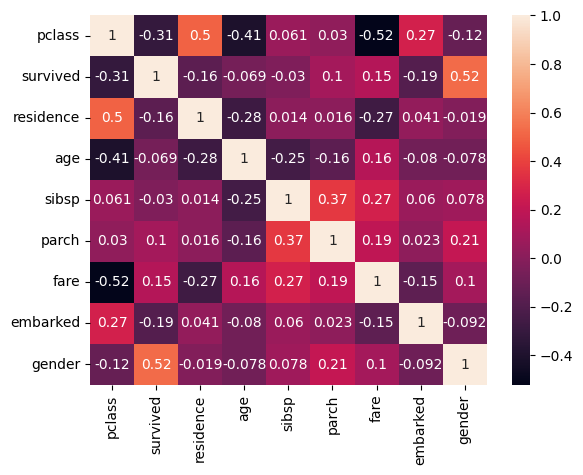

In [15]:
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)

## Вибір ознак, розділення даних та навчання моделі

In [16]:
X = df[['gender', 'pclass']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores: ", scores)
print("Average CV score: ", scores.mean())

model.fit(X_train, y_train)

Cross-validation scores:  [0.7638191  0.79396985 0.75879397 0.79292929 0.78787879]
Average CV score:  0.7794781990761889


RandomForestClassifier(random_state=42)

## Оцінка 

Classification Report:               precision    recall  f1-score   support

           0       0.70      0.99      0.82       140
           1       0.96      0.46      0.62       109

    accuracy                           0.76       249
   macro avg       0.83      0.72      0.72       249
weighted avg       0.81      0.76      0.73       249

Accuracy: 0.7550200803212851
Confusion Matrix:
 [[138   2]
 [ 59  50]]


<Axes: >

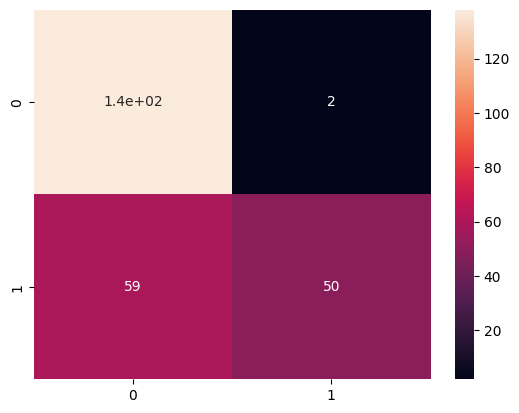

In [17]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Classification Report:', classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', conf_matrix)

sns.heatmap(data=conf_matrix, annot=True)

## Спроба покращити модель використовуючи додаткову незалежну ознаку та оптимізацію гіперпараметрів

In [18]:
X = df[['gender', 'pclass', 'fare']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

model = grid_search.best_estimator_
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores: ", scores)
print("Average CV score: ", scores.mean())

Cross-validation scores:  [0.75376884 0.8241206  0.74874372 0.75252525 0.72727273]
Average CV score:  0.7612862291254251


## Оцінка покращенної моделі

Classification Report:               precision    recall  f1-score   support

           0       0.75      0.94      0.83       140
           1       0.89      0.59      0.71       109

    accuracy                           0.79       249
   macro avg       0.82      0.77      0.77       249
weighted avg       0.81      0.79      0.78       249

Accuracy: 0.7871485943775101
Confusion Matrix:
 [[132   8]
 [ 45  64]]


<Axes: >

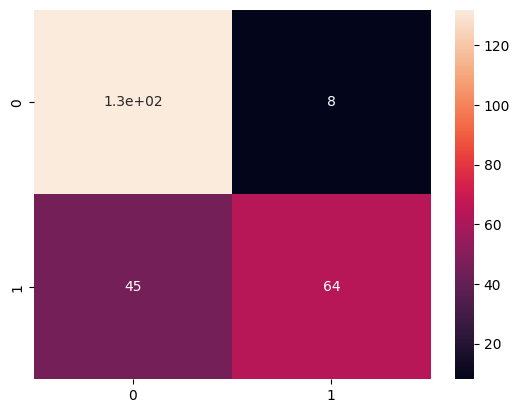

In [19]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Classification Report:', classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', conf_matrix)

sns.heatmap(data=conf_matrix, annot=True)